In [1]:
import pandas as pd
import numpy as np

td=pd.read_csv('timesData.csv')
td.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [2]:
td.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [3]:
td.shape

(2603, 14)

In [4]:
nan_count = td.female_male_ratio.isna().sum()
nan_count

233

In [5]:
type(td.female_male_ratio.iloc[1])

str

In [6]:
# edit the 'female_male_ratio' column so we can use it 

def convert_column(column):
    if pd.notna(column) and ':' in column:
        parts = column.split(':')
        denominator = float(parts[1])
        if denominator != 0:
            return float(parts[0]) / denominator
        else:
            return np.nan
    else:
        return np.nan

td.female_male_ratio = td.female_male_ratio.apply(convert_column)

In [7]:
td.female_male_ratio.fillna(td.female_male_ratio.median(),inplace=True)
td.female_male_ratio

0       1.083333
1       0.492537
2       0.587302
3       0.724138
4       0.818182
          ...   
2598    0.923077
2599    0.562500
2600    1.083333
2601    0.388889
2602    0.754386
Name: female_male_ratio, Length: 2603, dtype: float64

In [8]:
# To know which columns have NAN values in them

l="world_rank	university_name	country	teaching	international	research	citations	income	total_score	num_students	student_staff_ratio	international_students	female_male_ratio	year"
ls=l.split('\t')
print(ls)
nan_count_ls=[]
for k in ls:
    nan_count = td[k].isna().sum()
    nan_count_ls.append(nan_count)
print(nan_count_ls)

['world_rank', 'university_name', 'country', 'teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio', 'year']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 59, 59, 67, 0, 0]


In [9]:
# columns that contain NAN values

for r in range(len(ls)):
    if nan_count_ls[r] !=0:
        print (ls[r])

num_students
student_staff_ratio
international_students


In [10]:
td.dropna(inplace=True)
td.shape

(2536, 14)

In [11]:
td

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,1.083333,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,0.724138,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,0.818182,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,0.923077,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,0.562500,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,1.083333,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,0.388889,2016


In [12]:
### sample to test at the end 
sample_td=td.loc[2598:2602].copy()
sample_td.shape

(5, 14)

In [13]:
td=td.replace('-',np.nan)

In [14]:
td

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,1.083333,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,0.724138,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,"7,929",8.4,27%,0.818182,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,NaN,"21,958",15.3,3%,0.923077,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,NaN,"31,268",28.7,2%,0.562500,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,NaN,"4,122",3.7,3%,1.083333,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,NaN,"10,117",12.1,8%,0.388889,2016


In [15]:
td.dropna(inplace=True)
td.shape

(1039, 14)

In [16]:
td

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,1.083333,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,0.724138,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,0.851852,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,=196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,"20,174",15.2,29%,1.000000,2016
1999,=196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,"2,958",13.4,17%,1.564103,2016
2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,"16,841",43.2,8%,1.040816,2016
2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,"27,756",14.8,17%,1.702703,2016


In [17]:
# Modify the 'num_students' column & 'international_students' column (converting them to float type of Data)

td['num_students'] = td['num_students'].str.replace(',', '').astype(float)
td['international_students'] = td['international_students'].str.rstrip('%').astype(float)/100

In [18]:
columns_to_convert=['teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio', 'year']

for column in columns_to_convert:
    td[column] = td[column].astype('float64')

In [19]:
td.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students    float64
female_male_ratio         float64
year                      float64
dtype: object

# Prediction Model (Predicts Score)

In [20]:
# prepare the input 'x' & output 'y' data for the Model
# by droping Unrelevant Features (can be also done by indicating columns that are considered as 'Relevant Features')

x=td.drop(['university_name','country','total_score','world_rank','year'],axis=1)
y=td.total_score.copy()

x

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio
0,99.7,72.4,98.7,98.8,34.5,20152.0,8.9,0.25,1.083333
1,97.7,54.6,98.0,99.9,83.7,2243.0,6.9,0.27,0.492537
2,97.8,82.3,91.4,99.9,87.5,11074.0,9.0,0.33,0.587302
3,98.3,29.5,98.1,99.2,64.3,15596.0,7.8,0.22,0.724138
5,90.5,77.7,94.1,94.0,57.0,18812.0,11.8,0.34,0.851852
...,...,...,...,...,...,...,...,...,...
1998,30.9,84.3,27.5,81.5,34.7,20174.0,15.2,0.29,1.000000
1999,25.6,69.5,18.1,100.0,37.7,2958.0,13.4,0.17,1.564103
2000,30.8,55.9,27.4,87.7,47.1,16841.0,43.2,0.08,1.040816
2001,30.5,64.9,22.9,91.0,29.0,27756.0,14.8,0.17,1.702703


In [21]:
# prepare the the data for the Model

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=100)

In [22]:
x_train

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio
1944,40.2,48.9,36.3,88.1,52.2,56959.0,13.0,0.11,0.960784
294,41.1,35.3,43.6,85.8,28.5,31331.0,8.4,0.09,0.923077
153,49.5,70.7,48.9,51.2,60.0,38309.0,25.9,0.33,0.886792
307,56.0,24.9,58.9,49.5,66.3,9586.0,7.3,0.13,0.149425
123,52.8,24.7,59.1,52.8,97.1,32166.0,34.1,0.09,1.325581
...,...,...,...,...,...,...,...,...,...
1556,48.8,27.5,57.3,47.7,43.8,31891.0,11.9,0.07,0.639344
90,56.6,87.9,47.0,65.0,43.8,26583.0,6.5,0.19,1.325581
656,77.1,26.3,74.8,57.8,76.4,22809.0,5.6,0.07,1.083333
132,52.4,46.2,41.4,64.3,79.8,26467.0,31.2,0.16,1.083333


In [23]:
y_train

1944    54.3
294     54.5
153     51.2
307     52.8
123     54.4
        ... 
1556    49.3
90      57.7
656     66.8
132     53.3
1545    50.5
Name: total_score, Length: 831, dtype: float64

In [24]:
# Model Building

In [25]:
# Linear Regression

#1
#Training the Model

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
#2
#Applying the Model to Make a prediction

y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)

In [27]:
print(y_lr_train_pred) # represents the 80% of the Data

[54.45706692 54.67226402 51.66618879 52.99349837 53.93539858 69.55421303
 53.49788677 55.23241413 60.44589087 48.95016556 51.17682489 56.56371177
 47.42928737 49.43285698 46.19166503 59.89533985 49.30222088 55.35715362
 50.25847944 76.44752606 54.33530781 61.98456521 74.55850702 54.50228415
 63.46539175 44.42033125 58.2926436  62.07606136 51.45584875 63.32919222
 59.91455707 49.07067352 65.99447039 70.03724751 61.35273683 46.78125151
 46.96528319 72.23712166 76.16578949 48.1679618  57.86686343 48.94484364
 68.8040792  58.5769621  49.05518464 57.63458888 55.70419729 93.12155854
 61.65728065 50.01139423 49.54489769 51.80286501 79.32373662 78.28315215
 59.30989821 51.57551247 51.98951133 46.35203954 55.51292503 76.14061853
 42.44276409 45.76101023 67.87313726 53.69654227 51.2618716  81.77675792
 46.7171025  63.51001821 51.90889684 72.5456813  54.05054941 46.48484856
 73.16726343 91.69919378 55.51074427 74.48581911 48.70347    58.18339735
 49.092274   64.8095084  58.76234874 66.10378256 60

In [28]:
print(y_lr_test_pred)

[57.35375009 61.42679281 67.59197321 68.03989961 56.11456665 72.10744759
 63.20368368 81.58330415 51.88600766 51.072553   50.22281853 55.19957656
 49.37655438 93.96833149 60.73057178 77.67294148 59.66950954 56.93527226
 54.33434926 47.75552208 52.03306038 54.3578454  55.25392234 50.63208522
 49.5713599  66.23060712 55.9110283  57.59274572 50.18868648 44.98964443
 92.40875217 71.1363614  72.52692262 94.09603188 44.96671093 52.65961363
 63.78008277 50.16253982 77.33278914 74.02374585 57.23759522 71.23298167
 50.84003521 59.48756984 49.08610619 66.12147414 55.60759129 89.94155715
 76.28404979 52.70536239 75.12503836 45.8417612  59.80780559 52.58803245
 53.68264023 49.87902763 45.61433238 59.38114636 53.37157386 55.10234563
 91.09655764 52.04369302 53.99894054 46.92067241 53.03659177 85.20939223
 85.75427703 58.30222258 68.85425313 59.79984542 58.92052494 65.08827189
 51.76198497 95.05985846 62.57620458 46.00234447 71.31800188 48.84964487
 53.91094106 70.39725794 61.31555035 77.19558653 55

In [29]:
#3
#Evaluate the Model Performance

y_train

1944    54.3
294     54.5
153     51.2
307     52.8
123     54.4
        ... 
1556    49.3
90      57.7
656     66.8
132     53.3
1545    50.5
Name: total_score, Length: 831, dtype: float64

In [30]:
y_lr_train_pred

array([54.45706692, 54.67226402, 51.66618879, 52.99349837, 53.93539858,
       69.55421303, 53.49788677, 55.23241413, 60.44589087, 48.95016556,
       51.17682489, 56.56371177, 47.42928737, 49.43285698, 46.19166503,
       59.89533985, 49.30222088, 55.35715362, 50.25847944, 76.44752606,
       54.33530781, 61.98456521, 74.55850702, 54.50228415, 63.46539175,
       44.42033125, 58.2926436 , 62.07606136, 51.45584875, 63.32919222,
       59.91455707, 49.07067352, 65.99447039, 70.03724751, 61.35273683,
       46.78125151, 46.96528319, 72.23712166, 76.16578949, 48.1679618 ,
       57.86686343, 48.94484364, 68.8040792 , 58.5769621 , 49.05518464,
       57.63458888, 55.70419729, 93.12155854, 61.65728065, 50.01139423,
       49.54489769, 51.80286501, 79.32373662, 78.28315215, 59.30989821,
       51.57551247, 51.98951133, 46.35203954, 55.51292503, 76.14061853,
       42.44276409, 45.76101023, 67.87313726, 53.69654227, 51.2618716 ,
       81.77675792, 46.7171025 , 63.51001821, 51.90889684, 72.54

In [31]:
# two common regression evaluation metrics from scikit-learn (mean_squared_error and r2_score)
## to evaluate the performance of a Linear Regression model on both the training and testing datasets

from sklearn .metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred) #Lower MSE indicates better model performance.
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred) #Higher R2 indicates better model performance, with a maximum value of 1
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

#### MSE & R2 Metrics (Regression Evaluation Metrics)
- MSE measures the average squared difference between the actual and predicted values. (The MSE measures the average squared error, providing an idea of the magnitude of errors.)

- R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [32]:
print('LR MSE (Train): ',lr_train_mse)
print('LR R2 (Train): ',lr_train_r2)
print('LR MSE (Test): ',lr_test_mse)
print('LR R2 (Test): ',lr_test_r2)

LR MSE (Train):  0.07108072234771867
LR R2 (Train):  0.999557558955838
LR MSE (Test):  0.04604271562849836
LR R2 (Test):  0.9997239992525294


In [33]:
lr_results=pd.DataFrame(["Linear regression",lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()

In [34]:
lr_results.columns=['Method','Training MSE','Training R2','Testing MSE','Testing R2']

In [35]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,0.071081,0.999558,0.046043,0.999724


Text(0.5, 0, 'Experimental LogS')

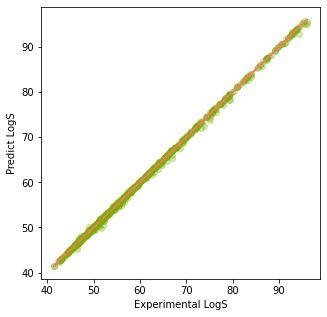

In [36]:
## Data visualization of prediction results

import matplotlib.pyplot as plt
import numpy as np

y_train = y_train.astype(float)
y_lr_train_pred = y_lr_train_pred.astype(float)

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS') #(experimental) target values

## Sample

In [37]:
## Adding a new data

sample_td

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,0.923077,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,0.562500,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,1.083333,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,0.388889,2016
2602,601-800,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,-,"8,663",20.6,4%,0.754386,2016


In [38]:
uni_name=sample_td.university_name.copy()
sample_td=sample_td.drop(['university_name','country','total_score','world_rank','year'],axis=1)

# Modify the 'num_students' column & 'international_students' column (converting them to float type of data)

sample_td['num_students'] = sample_td['num_students'].str.replace(',', '').astype(float)
sample_td['international_students'] = sample_td['international_students'].str.rstrip('%').astype(float)/100

sample_td

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,female_male_ratio
2598,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,0.03,0.923077
2599,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,0.02,0.562500
2600,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,0.03,1.083333
2601,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,0.08,0.388889
2602,16.2,17.7,18.3,28.6,39.8,8663.0,20.6,0.04,0.754386


## Let's finally use the Model :)

In [39]:
import joblib

joblib.dump(lr, 'linear_regression_model.pkl') #save the trained model to a file
loaded_model = joblib.load('linear_regression_model.pkl')

new_data = sample_td
new_predictions = loaded_model.predict(new_data)

print(f"Predictions for new data: {new_predictions}")

Predictions for new data: [19.5463595  14.71032296 23.44540497 17.64899606 21.34781575]


In [40]:
uni_name

2598             Yeungnam University
2599     Yıldız Technical University
2600        Yokohama City University
2601    Yokohama National University
2602              Yuan Ze University
Name: university_name, dtype: object

In [41]:
pd.Series(new_predictions)

0    19.546360
1    14.710323
2    23.445405
3    17.648996
4    21.347816
dtype: float64

In [42]:
uni_name.index= [0,1,2,3,4]

sample_df_results= pd.concat([uni_name, pd.Series(new_predictions)], axis=1)
sample_df_results.columns=['University name','score']
sample_df_results

,University name,score
0,Yeungnam University,19.546360
1,Yıldız Technical University,14.710323
2,Yokohama City University,23.445405
3,Yokohama National University,17.648996
4,Yuan Ze University,21.347816


In [43]:
# colormap we'll use: 'RdYlGn'

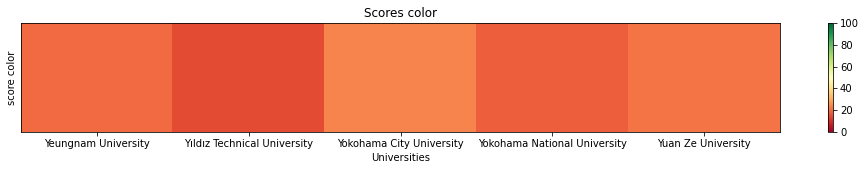

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def visualize(predictions,uni_name):

    default_scores = np.arange(101)
    array_of_scores = np.array(predictions)

    #Heatmap
    plt.figure(figsize=(17, 2))
    heatmap = plt.imshow(array_of_scores.reshape(1, -1), cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)

    color_bar = plt.colorbar(heatmap)

    plt.xlabel('Universities')
    plt.ylabel('score color')
    plt.title('Scores color')

    plt.yticks([])
    x_ticks = np.arange(len(array_of_scores))
    x_labels = np.array(uni_name)
    plt.xticks(x_ticks, x_labels)

    plt.show()

visualize(new_predictions,uni_name)

## Add a new data to the Model

In [45]:
input_data={'world_rank':'0',
             'university_name':'Virtual Uni',
             'country':'0',
             'teaching':'0',
             'international':'0',
             'research':'0',
             'citations':'0',
             'income':'0',
             'total_score':'0',
             'num_students':'0',
             'student_staff_ratio':'0',
             'international_students':'0%',
             'female_male_ratio':'1:1',
             'year':'0'}

input_data_df = pd.DataFrame([input_data])

input_data_df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,0,Virtual Uni,0,0,0,0,0,0,0,0,0,0%,1:1,0


In [46]:
input_data_df
data_types = input_data_df.dtypes
data_types

world_rank                object
university_name           object
country                   object
teaching                  object
international             object
research                  object
citations                 object
income                    object
total_score               object
num_students              object
student_staff_ratio       object
international_students    object
female_male_ratio         object
year                      object
dtype: object

float64
  world_rank university_name country  teaching  international  research  \
0          0     Virtual Uni       0       0.0            0.0       0.0   

   citations  income  total_score  num_students  student_staff_ratio  \
0        0.0     0.0          0.0           0.0                  0.0   

   international_students  female_male_ratio  year  
0                     0.0                1.0   0.0  
score=[0.08503107]


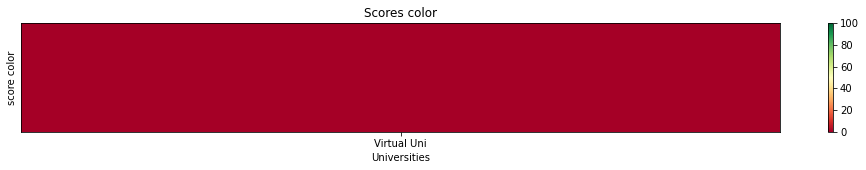

In [47]:
# input_data_df preprocessing

input_data_df.female_male_ratio = input_data_df.female_male_ratio.apply(convert_column)

if ',' in input_data_df['num_students'].iloc[0]:
    input_data_df['num_students'] = input_data_df['num_students'].str.replace(',', '').astype(float)
else:
    input_data_df['num_students'] = input_data_df['num_students'].astype(float)

input_data_df['international_students'] = input_data_df['international_students'].str.rstrip('%').astype(float)/100

print(input_data_df['international_students'].dtype)

columns_to_convert=['teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'student_staff_ratio', 'international_students', 'female_male_ratio', 'year']

for column in columns_to_convert:
    input_data_df[column] = input_data_df[column].astype('float64')
    
print(input_data_df)
    
input_uni_name=input_data_df.university_name
input_data_df=input_data_df.drop(['university_name','country','total_score','world_rank','year'],axis=1)

# Model
input_predictions = loaded_model.predict(input_data_df)
print(f'score={input_predictions}')

visualize(input_predictions,input_uni_name)